In [394]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
import sklearn
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
import seaborn as sns
from sklearn.utils import shuffle
from datetime import datetime, timedelta
import scipy.stats 
import tqdm
from scipy.integrate import quad
import torch 
from torch import nn
import pandas_ta as ta
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LogisticRegression

In [367]:
cols = ['open', 'high', 'low', 'close', 'volume']
# df = pd.concat([
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-01-01_2022-01-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-02-01_2022-02-28.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-03-01_2022-03-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-04-01_2022-04-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-05-01_2022-05-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-06-01_2022-06-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-07-01_2022-07-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-08-01_2022-08-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-09-01_2022-09-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-10-01_2022-10-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-11-01_2022-11-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2022-12-01_2022-12-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-01-01_2023-01-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-02-01_2023-02-28.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-03-01_2023-03-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-04-01_2023-04-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-05-01_2023-05-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-06-01_2023-06-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-07-01_2023-07-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-08-01_2023-08-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-09-01_2023-09-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-10-01_2023-10-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-11-01_2023-11-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2023-12-01_2023-12-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-01-01_2024-01-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-02-01_2024-02-29.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-03-01_2024-03-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-04-01_2024-04-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-05-01_2024-05-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-06-01_2024-06-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-07-01_2024-07-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-08-01_2024-08-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-09-01_2024-09-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-10-01_2024-10-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
#     pd.read_csv(r"Desktop/algo/datasets/SOLUSDT_1_2024-11-01_2024-11-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0)], axis = 0)

df = pd.concat([
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-01-01_2022-01-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-02-01_2022-02-28.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-03-01_2022-03-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-04-01_2022-04-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-05-01_2022-05-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-06-01_2022-06-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-07-01_2022-07-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-08-01_2022-08-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-09-01_2022-09-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-10-01_2022-10-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-11-01_2022-11-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2022-12-01_2022-12-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-01-01_2023-01-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-02-01_2023-02-28.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-03-01_2023-03-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-04-01_2023-04-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-05-01_2023-05-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-06-01_2023-06-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-07-01_2023-07-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-08-01_2023-08-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-09-01_2023-09-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-10-01_2023-10-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-11-01_2023-11-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2023-12-01_2023-12-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-01-01_2024-01-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-02-01_2024-02-29.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-03-01_2024-03-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-04-01_2024-04-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-05-01_2024-05-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-06-01_2024-06-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-07-01_2024-07-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-08-01_2024-08-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-09-01_2024-09-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-10-01_2024-10-31.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0),
    pd.read_csv(r"Desktop/algo/datasets/ETHUSDT_1_2024-11-01_2024-11-30.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0)], axis = 0)



In [368]:
# df = pd.read_csv(r"Desktop/algo/datasets/XRP.csv", names=['open', 'high', 'low', 'close', 'volume'], index_col=0)

In [369]:
df["close_ln"] = np.log(df["close"])
df

,open,high,low,close,volume,close_ln
2022.01.01 00:00,3645.90,3649.35,3645.90,3649.35,12.42,8.202304
2022.01.01 00:01,3649.35,3650.25,3648.65,3650.20,46.00,8.202537
2022.01.01 00:02,3650.20,3654.25,3650.20,3654.25,41.16,8.203646
2022.01.01 00:03,3654.25,3658.85,3654.25,3658.85,150.87,8.204904
2022.01.01 00:04,3658.85,3661.30,3658.85,3661.30,40.62,8.205574
...,...,...,...,...,...,...
2024.11.30 23:56,3712.40,3714.00,3711.91,3712.99,582.97,8.219593
2024.11.30 23:57,3712.99,3716.43,3712.81,3714.58,875.00,8.220021
2024.11.30 23:58,3714.58,3714.67,3712.37,3714.39,561.62,8.219970
2024.11.30 23:59,3714.39,3715.93,3713.55,3714.75,244.96,8.220067


In [370]:
df.index = range(0, df.shape[0])

In [371]:
df_copy = df[["close","low", "high", "open", "close_ln"]].copy()
prices_col = ["close", "low", "high", "open", "close_ln"]

In [372]:
data = pd.DataFrame((df_copy[prices_col].values[1:])/(df_copy[prices_col].values[0:-1]), columns=prices_col, index=range(1,df_copy.shape[0]))
data = data.dropna()
data.index = range(0,data.shape[0])

In [373]:
data

,close,low,high,open,close_ln
0,1.000233,1.000754,1.000247,1.000946,1.000028
1,1.001110,1.000425,1.001096,1.000233,1.000135
2,1.001259,1.001110,1.001259,1.001110,1.000153
3,1.000670,1.001259,1.000670,1.001259,1.000082
4,0.999413,1.000068,1.000724,1.000670,0.999928
...,...,...,...,...,...
1376345,1.000159,0.999973,1.000269,0.999890,1.000019
1376346,1.000428,1.000242,1.000654,1.000159,1.000052
1376347,0.999949,0.999881,0.999526,1.000428,0.999994
1376348,1.000097,1.000318,1.000339,0.999949,1.000012


In [374]:
warnings.filterwarnings("ignore")
# for i in range(1,10):
#     data[f"mean_ch_close_{i}"] = data["close"].rolling(window=5*i).apply(np.prod, raw=True) - data["close"]
#     data[f"sum_close_{i}"] =data["close"].rolling(window=5*i).apply(np.prod, raw=True) 
#     data[f"st_dev_close_{i}"] = data["close"].rolling(window=5*i).apply(np.std, raw=True) 
#     data[f"min_close_{i}"] = data["close"].rolling(window=5*i).min()
#     data[f"max_close_{i}"] = data["close"].rolling(window=5*i).max()
#     data[f"skew_close_{i}"] = data["close"].rolling(window=5*i).skew()
#     data[f"cov_close_{i}"] = data["close"].rolling(window=5*i).cov()
#     data[f"median_close_{i}"] = data["close"].rolling(window=5*i).median()

strat = ta.Strategy(
        name="Test",
        description="Common Price SMAs: 10, 20, 50, 200 and Volume SMA: 20.",
        ta=[
            {"kind": "sma", "close":"close_ln",  "length": 100},
            {"kind": "sma", "close":"close_ln", "length": 50},
            {"kind": "sma", "close":"close_ln", "length": 20},
            {"kind": "sma", "close":"close_ln","length": 10},
            {"kind": "sma",  "close":"close_ln","length": 5},

            {"kind": "ema", "close":"close_ln", "length": 100},
            {"kind": "ema", "close":"close_ln", "length": 50},
            {"kind": "ema", "close":"close_ln", "length": 20},
            {"kind": "ema", "close":"close_ln", "length": 10},
            {"kind": "ema", "close":"close_ln", "length": 5},
            
            {"kind": "bbands", "close":"close_ln", "length": 100},
            {"kind": "bbands", "close":"close_ln", "length": 80},
            {"kind": "bbands", "close":"close_ln", "length": 40},
            {"kind": "bbands", "close":"close_ln", "length": 20},
            {"kind": "bbands", "close":"close_ln", "length": 10},
            {"kind": "stochrsi","close":"close_ln"},
            
            {"kind": "macd","close":"close_ln", "fast": 8, "slow": 21},
            {"kind": "zscore","close":"close_ln"},
            {"kind": "roc","close":"close_ln"},
            {"kind": "aroon","close":"close_ln"},
            {"kind": "log_return", "close":"close_ln", "length": 20},
        ]
    )

data.ta.cores = 0
data.ta.strategy(strat)
data = data.dropna()

In [375]:
def fol_make(arr):
    min_res = 1
    max_res = 1
    for i in range(0,2):
        max_res = max(np.prod(arr[:i+1]), max_res)
        min_res = min(np.prod(arr[:i+1]), min_res)
    for i in range(2,10):
        if np.prod(arr[:i+1]) >= max_res or np.prod(arr[:i+1]) <= min_res:
            return np.prod(arr[:i+1])
    return 1

In [376]:
def prices_make(arr, all_prices):
    all_prices.append(arr)
    return None

In [377]:
def make_data(data, n=10, pred=10):
    y = (data["close"]).rolling(window=pred).apply(np.prod).shift(-pred)[n-1:-pred].values 
    # (data["close"]).rolling(window=pred).apply(lambda s: prices_make(s, copy_of_prices)).shift(-pred)[n-1:-pred].values
    X = data[n-1:-pred]
    for i in range(1,n):
        X = pd.concat([X,data["close_ln"].shift(i).rename(f"close_{i}")[n-1:-pred]], axis = 1)
    features_names = X.columns
    return X,y-1,features_names

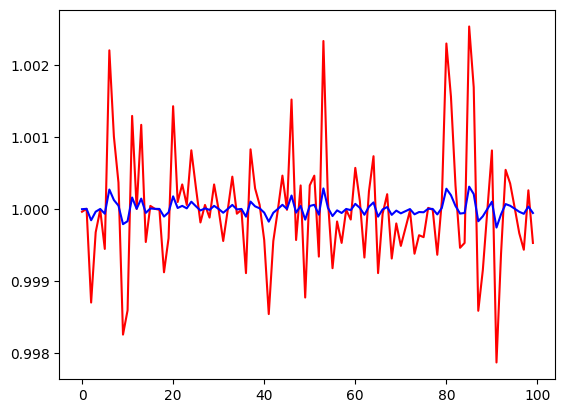

In [378]:
plt.plot(range(0,100), data["close"].iloc[0:100],color = "red")
plt.plot(range(0,100), data["close_ln"].iloc[0:100],color = "blue")

In [379]:
X, y, features_names = make_data(data)

In [380]:
y_copy = y.copy()

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X,y_copy, test_size=0.2, shuffle=False, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=False, random_state=42)

In [382]:
model = CatBoostRegressor(n_estimators=3000, feature_border_type="Uniform", use_best_model=True, border_count=16*254, loss_function="MAE", grow_policy="Depthwise", random_state=42, min_data_in_leaf=10, early_stopping_rounds = 10)

In [445]:
X, y, features_names = make_data(data, pred=15)
y_copy = y.copy()
X_train, X_test, y_train, y_test = train_test_split(X,y_copy, test_size=0.2, shuffle=False, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=False, random_state=42)
model = CatBoostRegressor(bootstrap_type="No", n_estimators=3000, feature_border_type="Uniform", use_best_model=True, border_count=16*254, loss_function="MAE", grow_policy="Depthwise", random_state=42, min_data_in_leaf=10, early_stopping_rounds = 10)
model.fit(X_train, y_train, eval_set = (X_val, y_val))
model.set_feature_names(features_names)

KeyboardInterrupt: 

In [444]:
(y_val > 0).mean()

0.5054928586026023

In [442]:
(pred > 0)[abs(pred) > 0.0001].mean()

0.47121090491256235

In [436]:
pred = model.predict(X_val)
p,q = 0.0001, 2
print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_val.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_val.reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_val.reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())

0.5444586107569533
Long wr: 0.5505152572946069
Short wr: 0.5390614535117355
Part of such samples: 0.577043075455846


In [433]:
pred = model.predict(X_test)
p,q = 0.0001, 2
print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_test.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test.reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test.reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())

0.5427923047975277
Long wr: 0.5453753926886377
Short wr: 0.5403635317675433
Part of such samples: 0.6371896832980312


0.5118376550169109
Long wr: 0.6159420289855072
Short wr: 0.46481178396072015
Part of such samples: 0.0887


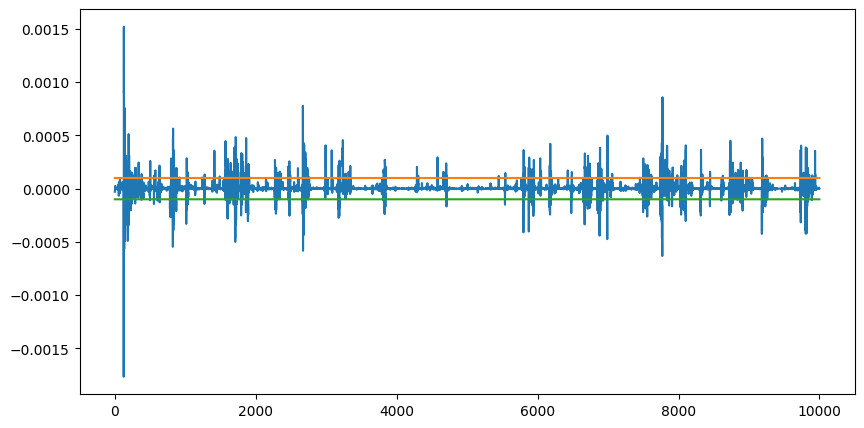

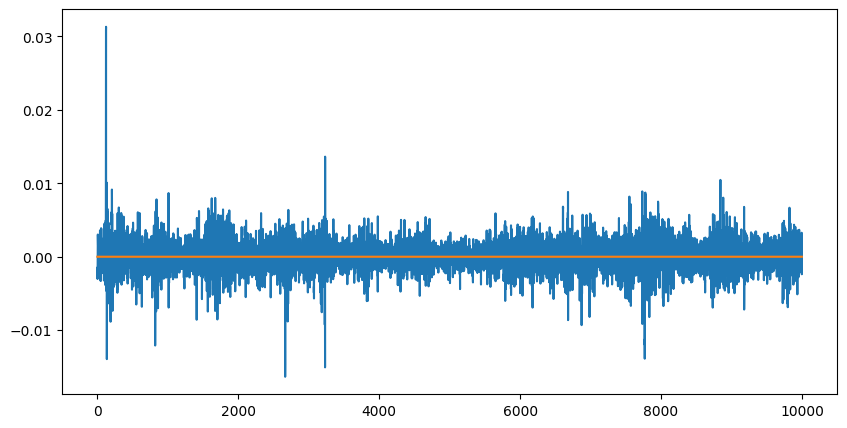

In [54]:
end = 10000
start = 0
pred = model.predict(X_test[start:end])
p,q = 0.0001, 1
print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_test[start:end].reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test[start:end].reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test[start:end].reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())
plt.figure(figsize=(10,5))
plt.plot(range(end-start), (pred)*np.sign(y_test[start:end]))
plt.plot(range(end-start), [p]*(end-start))
plt.plot(range(end-start), [-p]*(end-start))
plt.show()
plt.figure(figsize=(10,5))
plt.plot(range(end-start), np.sign(pred)*(y_test[start:end]))
plt.plot(range(end-start), [0]*(end-start))

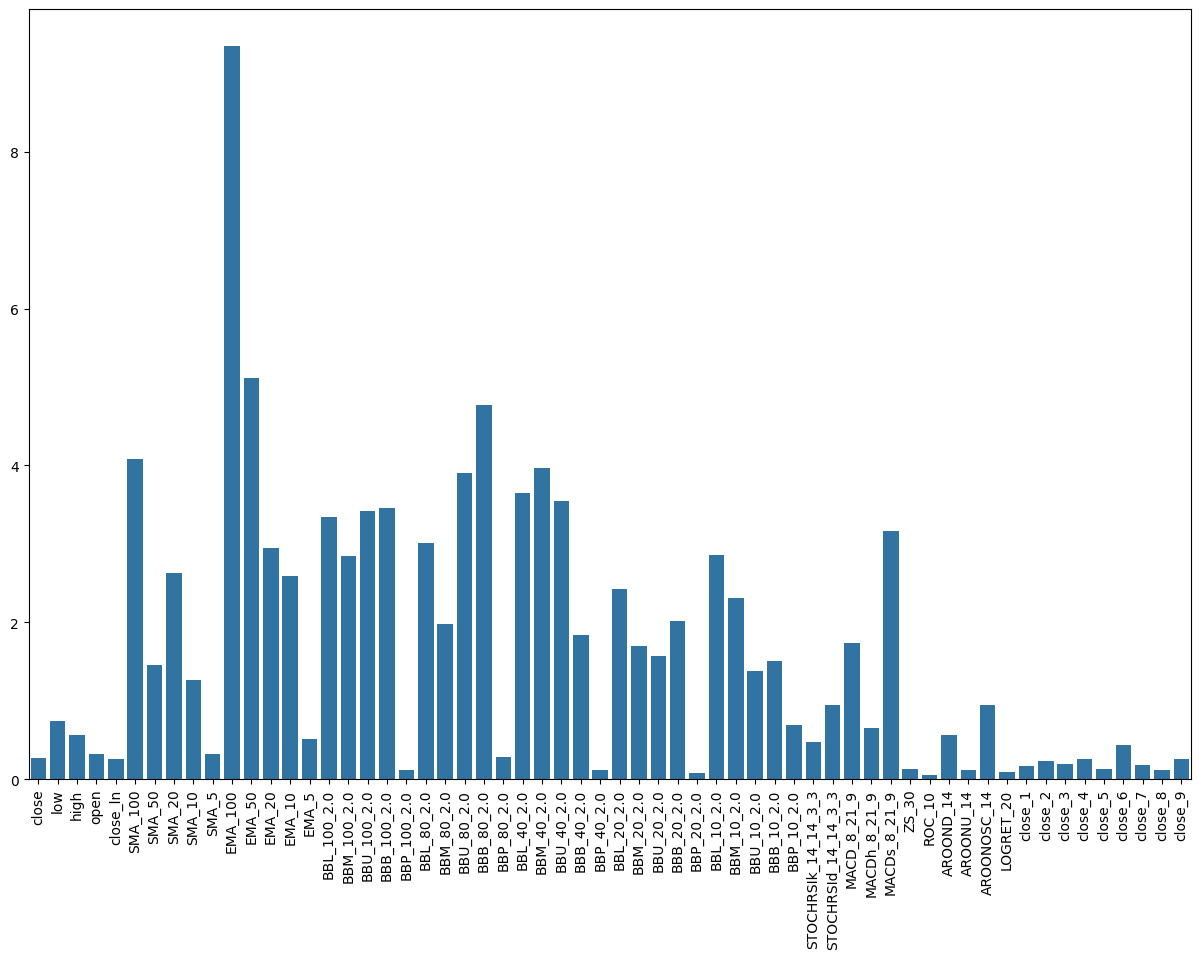

In [145]:
d = model.feature_importances_
plt.figure(figsize=(15,10))
sns.barplot(data=pd.Series(data=d,index=features_names))
ticks = plt.xticks(rotation=90)
plt.show()

In [420]:
X_test = X
y_test = y

In [60]:
long_list = []
short_list = []
long_list_w = []
short_list_w = []
for i in (range(0, y_test.shape[0]-100, 100)):
    st, en = i, i+100
    p, q = 0.0001, 1
    pred = model.predict(X_test[st:en])
    print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_test[st:en].reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
    print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
    print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
    print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())
    print("stability:", (y_test[st:en]>0).mean())
    print( "If dogodalsya profit: ", y_test[st:en][(pred>p) & (y_test[st:en]>0)].sum(), " If dogodalsya profit: ", y_test[st:en][(pred<-p) & (y_test[st:en]<0)].sum())
    print("If proebalsya loss: ", y_test[st:en][(pred>p) & (y_test[st:en]<0)].sum(), " If proebalsya loss: ", y_test[st:en][(pred<-p) & (y_test[st:en]>0)].sum())
    long_list.append((np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)>p) & ((pred) < q)])).sum())
    short_list.append((np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)<-p) & ((pred) > -q)])).sum())
    short_list_w.append((((pred)<-p) & ((pred) > -q)).sum())
    long_list_w.append((((pred)>p) & ((pred) < q)).sum())

nan
Long wr: nan
Short wr: nan
Part of such samples: 0.0
stability: 0.53
If dogodalsya profit:  0.0  If dogodalsya profit:  0.0
If proebalsya loss:  0.0  If proebalsya loss:  0.0
0.30434782608695654
Long wr: nan
Short wr: 0.30434782608695654
Part of such samples: 0.69
stability: 0.62
If dogodalsya profit:  0.0  If dogodalsya profit:  -0.06352113707531504
If proebalsya loss:  0.0  If proebalsya loss:  0.1563163857334564
0.625
Long wr: nan
Short wr: 0.625
Part of such samples: 0.16
stability: 0.56
If dogodalsya profit:  0.0  If dogodalsya profit:  -0.035591412873477224
If proebalsya loss:  0.0  If proebalsya loss:  0.006033997861529361
1.0
Long wr: 1.0
Short wr: nan
Part of such samples: 0.03
stability: 0.51
If dogodalsya profit:  0.013963948991402297  If dogodalsya profit:  0.0
If proebalsya loss:  0.0  If proebalsya loss:  0.0
nan
Long wr: nan
Short wr: nan
Part of such samples: 0.0
stability: 0.43
If dogodalsya profit:  0.0  If dogodalsya profit:  0.0
If proebalsya loss:  0.0  If proe

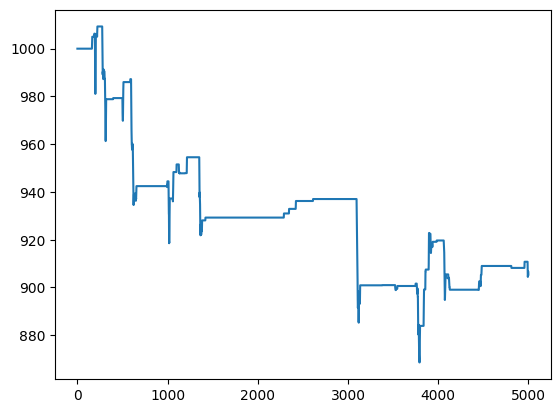

In [424]:
res_list = []
res = 1000
com = 0.0005
p = 0.0002
pred = model.predict(X_test)
for i, prediction in enumerate(pred):
    if np.sign(prediction) == np.sign(y_test[i]) and abs(prediction) > p:
        res += res*(abs(y_test[i])-com)
    elif abs(prediction) > p and np.sign(prediction) != np.sign(y_test[i]):
        res -= res*(abs(y_test[i])+com)
    res_list.append(res)
plt.plot(range(len(res_list[0:5000])), res_list[0:5000])
plt.show()